In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib

In [24]:
cr_loan = pd.read_csv('../data/raw_credit_data.csv')
cr_loan.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [25]:
print(cr_loan.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
person_age                    32581 non-null int64
person_income                 32581 non-null int64
person_home_ownership         32581 non-null object
person_emp_length             31686 non-null float64
loan_intent                   32581 non-null object
loan_grade                    32581 non-null object
loan_amnt                     32581 non-null int64
loan_int_rate                 29465 non-null float64
loan_status                   32581 non-null int64
loan_percent_income           32581 non-null float64
cb_person_default_on_file     32581 non-null object
cb_person_cred_hist_length    32581 non-null int64
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB
None


- `loan_status` shows whether the loan is currently in default with 1 being default and 0 being non-default.

### Histogram

- Plot a histogram of loan_amnt

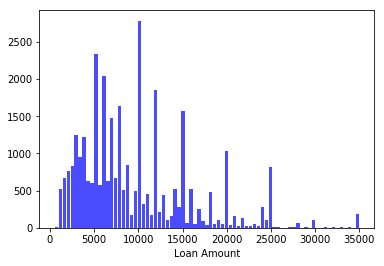

In [26]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

### Scatter plot
- Create a scatter plot of a person's income and age. In this case, income is the independent variable and age is the dependent variable.

There are 32 000 rows of data so the scatter plot may take a little while to plot.


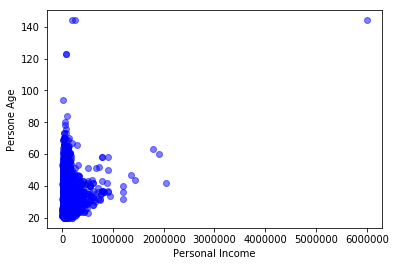

In [27]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

- We can already see a positive correlation with age and income, which could mean these older recipients are further along in their career and therefore earn higher salaries. There also appears to be an outlier in the data.

### Crosstab and pivot tables
- Often, financial data is viewed as a pivot table in spreadsheets like Excel.With cross tables, you get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.
- We need to check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.

In [28]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


- Create a cross table of home ownership grouped by loan_status and loan_grade.

In [29]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


- Create a cross table of home ownership, loan status, and average loan_percent_income.

In [30]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan["loan_status"],
              values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


### Boxplot

- Create a boxplot of the loan's percent of the person's income grouped by loan_status.

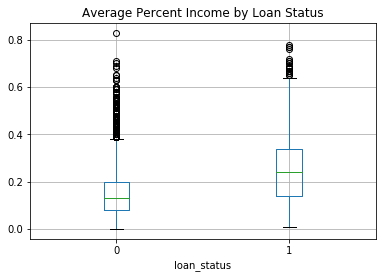

In [31]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

- It looks like the average percentage of income for defaults is higher. This could indicate those recipients have a debt-to-income ratio that's already too high.

### Visualizing & Removing outliers

- Print the cross table of loan_status and person_home_ownership with the max person_emp_length.
- Create and array of indices for records with an employment length greater than 60. Store it as indices.
- Drop the records from the data using the array indices and create a new dataframe called cr_loan_new.

In [32]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(indices)

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [33]:
# Create the cross table from earlier and include minimum employment length
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
            values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


- Generally with credit data, key columns like `person_emp_length` are of high quality, but there is always room for error. With this in mind, we build our intuition for detecting outliers!

### Visualizing credit outliers


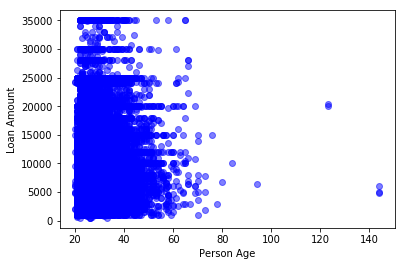

In [34]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

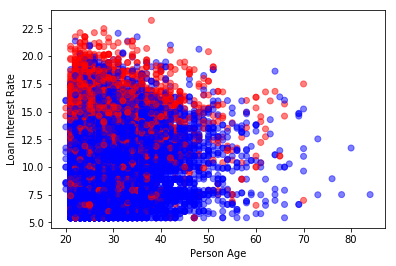

In [35]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

-  Notice that in this plot we have `loan_status` as a label for colors. This shows a different color depending on the class. In this case, it's loan default and non-default, and it looks like there are more defaults with high interest rates.

### Replacing missing credit data
- Check for missing data. If we find missing data within `loan_status`, we would not be able to use the data for predicting probability of default because we wouldn't know if the loan was a default or not. Missing data within `person_emp_length` would not be as damaging, but would still cause training errors.
- So, check for missing data in the `person_emp_length` column and replace any missing values with the median.

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

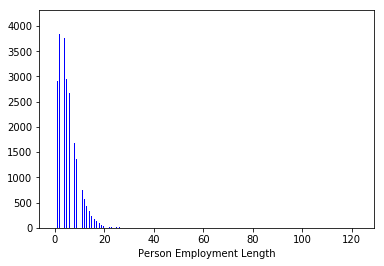

In [36]:
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

-  We can use several different functions like `mean()` and `median()` to replace missing data. The goal here is to keep as much of our data as we can! It's also important to check the distribution of that feature to see if it changed.

### Removing missing data
- Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult.Because interest rates are set by our company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but we cannot know for sure. For now, it's best to .drop() these records before moving forward.

In [37]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


-  Now that the missing data and outliers have been processed, the data is ready for modeling! More often than not, financial data is fairly tidy, but it's always good to practice preparing data for analytical work.

### Missing data intuition
- We've been looking at numeric columns, but what about a non-numeric column? How would you handle missing data in the column person_home_ownership which has string values?
- We already have an all-inclusive class within person_home_ownership that stores all other types of home ownership as Other. With this, we eliminate missing data without affecting the data as a whole.

### Logistic regression basics
- Interest rates are easy to understand, but what how useful are they for predicting the probability of default? 
- Since we haven't tried predicting the probability of default yet, test out creating and training a logistic regression model with just `loan_int_rate`. Also check the model's internal parameters, which are like settings, to see the structure of the model with this one column.

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.4586918]


-  Notice that the model was able to fit to the data, and establish some parameters internally. It's even produced an `.intercept_ value` like in the lecture. What if we use more than one column?

### Multivariate logistic regression
- Generally, we won't use only `loan_int_rate` to predict the probability of default. We will want to use all the data you have to make predictions. With this in mind, try training a new model with different columns, called features, from the cr_loan_clean data. Will this model differ from the first one? For this, we can easily check the `.intercept_ ` of the logistic regression. **Remember that this is the y-intercept of the function and the overall log-odds of non-default.**

In [39]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.2253171]


-  Take a closer look at each model's .intercept_ value. The values have changed! The new clf_logistic_multi model has an .intercept_ value closer to zero. This means the log odds of a non-default is approaching zero.

### Creating training and test sets
- intercept_, which is an attribute of the model, LogisticRegression() models also have the .coef_ attribute. This shows how important each training column is for predicting the probability of default.

In [40]:
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 8.34020099e-02 -6.02470833e-02 -3.28983416e-05]]


- three columns were used for training and there are three values in `.coef_`? This tells us how important each column, or feature, was for predicting. The more positive the value, the more it predicts defaults. Look at the value for `loan_int_rate`

### Changing coefficients


In [42]:
X1_train, X2_train, y1_train, y2_train = train_test_split(X, y, test_size=.5, random_state=123)
# Print the first five rows of each training set
print(X1_train.head(5))
print(X2_train.head(5))

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y1_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y2_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

       loan_int_rate  person_emp_length  person_income
32376          13.23                2.0          31500
3200            7.49                0.0          36000
16462          14.22                4.0          45600
29969          10.75               13.0          35827
13104          11.71                6.0          95000
       loan_int_rate  person_emp_length  person_income
30015          12.87                2.0          70000
22648          10.62               14.0          56700
9634            5.42                6.0          63000
3455           13.57                2.0          55000
16426          13.79                1.0          32000
[[ 7.91698626e-02 -9.98116919e-03 -3.66290600e-05]]
[[ 8.55009743e-02 -1.81376046e-02 -3.60586280e-05]]


-  Notice that the coefficient for the `person_income` changed when we changed the data from X1 to X2. This is a reason to keep most of the data, because the models will learn differently depending on what data they're given!

### One-hot encoding credit data
